In [2]:
from manim import *
import math
import jupyter_capture_output

video_scene = " -v WARNING  --disable_caching lense_Scene"
image_scene = f" -v WARNING --disable_caching -r {2*427},{2*240}  -s lense_Scene"

In [122]:
class Lense(Mobject):
	def __init__(self, center = np.array([0, 0, 0]), height = 4, f = 3, **kwargs):
		super().__init__(**kwargs)

		self.lense_center = center
		self.lense_height = height
		self.lense_focal_length = f

		r_circ = np.sqrt((height/2)**2 + f**2)
		lense_width = r_circ - abs(f)
		circ_left = Circle(radius = r_circ).move_to(self.lense_center + f*LEFT)
		circ_right = Circle(radius = r_circ).move_to(self.lense_center + f*RIGHT)
		if f > 0:
			lense = Intersection(circ_left, circ_right, color = BLUE, stroke_opacity = 1, fill_opacity = 0.5)
			self.add(lense)
		else:
			i_left = Intersection(circ_left, circ_right, color = BLUE, stroke_opacity = 1, fill_opacity = 0.5).shift((lense_width+0.1)*LEFT)
			i_right = Intersection(circ_left, circ_right, color = BLUE, stroke_opacity = 1, fill_opacity = 0.5).shift((lense_width+0.1)*RIGHT)
			u_left_right = Union(i_left, i_right, color = RED)
			rect = Rectangle(height = self.lense_height, width = 2*(lense_width+0.1)).move_to(self.lense_center)
			i_left_right = Intersection(u_left_right, rect)
			lense = Exclusion(rect, i_left_right, color = BLUE, stroke_opacity = 1, fill_opacity = 0.5)
			self.add(lense)

		baseline = Line(start = self.lense_center + 2*self.lense_focal_length*LEFT, end = self.lense_center + 2*self.lense_focal_length*RIGHT)
		lense_center_line = DashedLine(start = self.lense_center + height/2*UP, end = self.lense_center + height/2*DOWN, stroke_width = 1)
		f_left = DashedLine(start = self.lense_center + self.lense_focal_length*LEFT + height/2*UP, end = self.lense_center + self.lense_focal_length*LEFT + height/2*DOWN)
		f_right = DashedLine(start = self.lense_center + self.lense_focal_length*RIGHT + height/2*UP, end = self.lense_center + self.lense_focal_length*RIGHT + height/2*DOWN)
		self.add(baseline, lense_center_line, f_left, f_right)

		# descriptors
		left_brace = BraceBetweenPoints(self.lense_center + self.lense_focal_length*LEFT + height/2*DOWN, self.lense_center + height/2*DOWN, direction = DOWN)
		right_brace = BraceBetweenPoints(self.lense_center + self.lense_focal_length*RIGHT + height/2*DOWN, self.lense_center + height/2*DOWN, direction = DOWN)
		left_brace_descriptor = MathTex("f").next_to(left_brace, DOWN)
		right_brace_descriptor = MathTex("f").next_to(right_brace, DOWN)
		self.add(left_brace, right_brace, left_brace_descriptor, right_brace_descriptor)


	def get_beam(self, f_pos, lense_pos, show_points):
		parallel_direction = self.lense_focal_length*RIGHT + (lense_pos - f_pos)*UP
		out_direction = (self.lense_center + parallel_direction) - (self.lense_center + lense_pos*UP)
		cross_f = Cross(color = RED, scale_factor = 0.125).move_to(self.lense_center + self.lense_focal_length*LEFT + f_pos*UP)
		cross_lense = Cross(color = RED, scale_factor = 0.125).move_to(self.lense_center + lense_pos*UP)
		if show_points:
			self.add(cross_f, cross_lense)
		if self.lense_focal_length > 0:
			beam_in = Line(start = self.lense_center + lense_pos*UP - 2*parallel_direction, end = self.lense_center + lense_pos*UP, color = RED, stroke_width = 4)
			beam_out = Line(start = self.lense_center + lense_pos*UP, end = self.lense_center + lense_pos*UP + 2*out_direction, color = RED, stroke_width = 4)
			beam_parallel = DashedLine(start = self.lense_center - 2*parallel_direction, end = self.lense_center + 2*parallel_direction, color = RED, stroke_width = 4, stroke_opacity = 0.5)
			self.add(beam_in, beam_out, beam_parallel)
		else:
			return


Manim Community v0.18.1

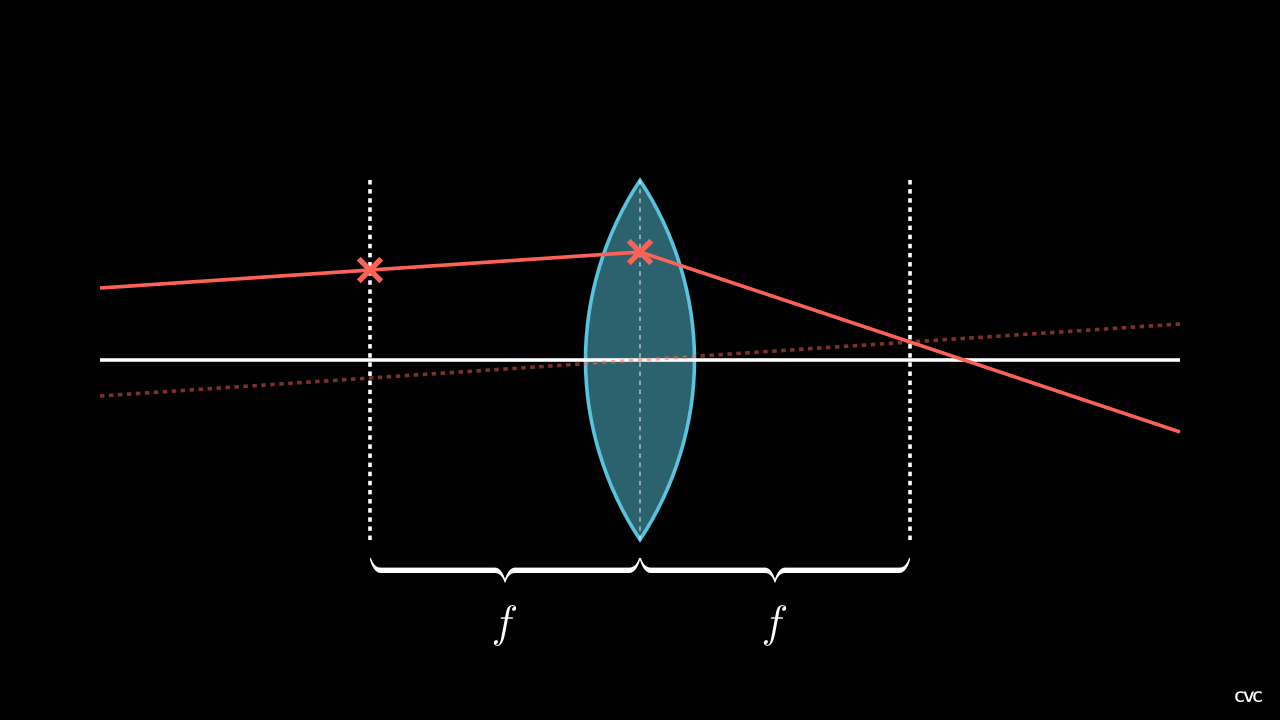

In [123]:
%%manim -qm --fps 60 $video_scene


class lense_Scene(Scene):
	def construct(self):

		CVC = Text('CVC', font_size = 12, weight = BOLD, color = WHITE, font = 'Latin Modern Sans').align_on_border(RIGHT + DOWN, buff = 0.2)
		self.add(CVC)

		lense = Lense()
		self.add(lense)


		# incoming beam (points marked with red crosses)
		height_at_focal_length = 1
		height_at_lense = 1.2
		show_points = True

		lense.get_beam(height_at_focal_length, height_at_lense, show_points)